In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

Missing Values imputation

In [4]:
dfs = pd.read_excel(r'TK_Masterdata.xlsx', engine='openpyxl')
df=pd.DataFrame(dfs)
#1.replacing \n with space
df= df.replace(to_replace='\n', value=" ", regex=True) #as we are replacing substring, so regex used
df['Affiliation'] = df['Affiliation'].replace({'Gen Mus':'Gen Mush'}) #data munging in column 'Affiliation'
#2.eliminating double space
df = df.replace(to_replace='  ', value=" ", regex=True)
#3.renaming columns to eliminate gaps in between column titles
def renaming(df):
 df.rename(columns={'Detail of Gifts':'Detail_of_Gifts', "Item Category":'Item_Category',
                  'Name of Recipient':'Name_of_Recipient', 'Assessed Value':'Assessed_Value',
                  'Retention Cost':'Retention_Cost'},
              inplace=True)
renaming(df)
df

,Detail_of_Gifts,Item_Category,Name_of_Recipient,Affiliation,Date,Assessed_Value,Retention_Cost,Retained,Remarks
0,Two small silver Bowls,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Mush,2002-01-08 00:00:00,"Rs.5,000/-",Free of cost,Yes,Yes
1,One Pilot Pen with ink,Pen,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Mush,2002-01-08 00:00:00,"Rs.3,500/-",Free of cost,Yes,Yes
2,One silver vase,Decoration Pieces,"Mr. Shaukat Aziz, Minister for Finance",Gen Mush,2002-01-09 00:00:00,"Rs.7,500/-",Free of cost,Yes,Yes
3,One (decoration) folding Screen,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Mush,2002-01-15 00:00:00,"Rs.2,200/-",Free of cost,Yes,Yes
4,One Decoration Piece,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Mush,2002-01-22 00:00:00,"Rs.2,000/-",Free of cost,Yes,Yes
...,...,...,...,...,...,...,...,...,...
4641,One W/Watch (Rolex),Watch,"Pakistan to KSA, Raja Ijaz",NaN,24-02-2023,NaN,NaN,In process,In process
4642,One Ladies Dupatta One Key Chain One Card Hold...,Clothes,First Lady of Pakistan,PMLN,28-02-2023,NaN,NaN,In process,NaN
4643,One Rug/Carpet Secretary,Carpet,"Mr. Asad Majeed Khan, Foreign Sec",NaN,01-03-2023,NaN,NaN,In process,NaN
4644,"Two ladies suits, One Fancy Dupatta One Vase O...","Clothes, Decoration Pieces",First Lady of Pakistan,NaN,02-03-2023,NaN,NaN,In process,NaN


Cleaning Data

In [5]:
df=df[df['Assessed_Value'].str.contains('NCV')==False]
df=df[df['Assessed_Value'].str.contains('each')==False]
df.Affiliation = df.Affiliation.fillna('Unknown')
df.Item_Category = df.Item_Category.fillna('Unknown')
df.Assessed_Value = df.Assessed_Value.fillna(0)

In [6]:
newarray=[]
df
def convertNumbers(value2):
  value=str(value2)
  for j in value.split('\n'):
     if 'Rs' in j:
       try:
          value=int(j.split("Rs.")[1].replace(",","").replace("/-","").replace("-","").replace(" (each)",""))
          return value
       except ValueError:
         return 0
 
df['Assessed_Value']=df["Assessed_Value"].apply(convertNumbers)
df  

,Detail_of_Gifts,Item_Category,Name_of_Recipient,Affiliation,Date,Assessed_Value,Retention_Cost,Retained,Remarks
0,Two small silver Bowls,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Mush,2002-01-08 00:00:00,5000.0,Free of cost,Yes,Yes
1,One Pilot Pen with ink,Pen,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Mush,2002-01-08 00:00:00,3500.0,Free of cost,Yes,Yes
2,One silver vase,Decoration Pieces,"Mr. Shaukat Aziz, Minister for Finance",Gen Mush,2002-01-09 00:00:00,7500.0,Free of cost,Yes,Yes
3,One (decoration) folding Screen,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Mush,2002-01-15 00:00:00,2200.0,Free of cost,Yes,Yes
4,One Decoration Piece,Decoration Pieces,"Mr. Abdul Sattar, Minister for Foreign Affairs",Gen Mush,2002-01-22 00:00:00,2000.0,Free of cost,Yes,Yes
...,...,...,...,...,...,...,...,...,...
4537,One Calligraphy duly framed,Unknown,"SP Mahzoor Ali Ghauri, Chief Security Officer ...",Unknown,2022-10-20 00:00:00,42000.0,"Rs.6,000/-",Yes,Yes
4538,a. Torsyk Set with silver Tray b. Book c. Book...,Unknown,"Mian Muhammad Shehbaz Sharif, Prime Minister o...",PMLN,2022-10-20 00:00:00,0.0,-,S.No.(a) displayed at Prime Minister House S.N...,S.No.(a) displayed at Prime Minister House S.N...
4539,One Carved wood panel,Unknown,"Mian Muhammad Shehbaz Sharif, Prime Minister o...",PMLN,2022-10-20 00:00:00,50000.0,-,No,No
4540,a. One Book b. One Book c. One Insignia,Unknown,"Ms. Marriyum Aurangzeb, Minister of Information",Unknown,2022-10-24 00:00:00,0.0,Free of cost,In process,In process


Highest Gifts in a tenure

Text(0.5, 0, 'Number of gifts received')

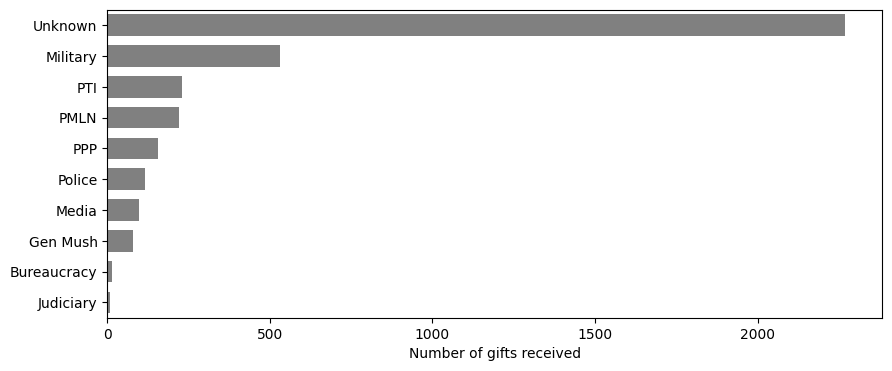

In [7]:
df.Affiliation.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(y=df.Affiliation.value_counts().index, x=df.Affiliation.value_counts().values,
            color='grey', width=0.7)
            #palette='flare', width=0.9)
plt.xlabel("Number of gifts received")

Most Expensive Watch

In [8]:

print("Most Expensive Watch")
df[df.Item_Category=='Watch'].groupby(['Item_Category'])['Name_of_Recipient','Assessed_Value'].max()

Most Expensive Watch


/var/folders/r3/fj27dd690wn_t88dw3_1yr6h0000gn/T/ipykernel_5453/173332712.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[df.Item_Category=='Watch'].groupby(['Item_Category'])['Name_of_Recipient','Assessed_Value'].max()
/var/folders/r3/fj27dd690wn_t88dw3_1yr6h0000gn/T/ipykernel_5453/173332712.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df[df.Item_Category=='Watch'].groupby(['Item_Category'])['Name_of_Recipient','Assessed_Value'].max()


,Assessed_Value
Item_Category,
Watch,140000000.0


With most Watches

In [9]:
watch_counts = df[df.Item_Category == 'Watch'].groupby(['Name_of_Recipient']).count().sort_values(['Item_Category'], ascending=False)
watch_counts['Detail_of_Gifts']

Name_of_Recipient
Mr. Shaukat Aziz, Prime Minister of Pakistan                 16
Mr. Muhammad Nawaz Sharif, Prime Minister of Pakistan         7
Admiral M. Zakaullah, Chief of Naval Staff                    5
Admiral Muhammad Zakaullah, Chief of Naval Staff              5
Mr. Sohail Mehmood, Foreign Secretary                         4
                                                             ..
Mr. Abid Ullah Jan, Valet, PM Office                          1
Mr. Adeel Ahmad Khan, Protocol Officer, Foreign Affairs       1
Mr. Adeel Ahmed Khan,                                         1
Mr. Adeel Ahmed Khan, Deputy Chief of protocol(v-II) MOFA     1
Zeeshan Ahmed, Charge d’ Affairs                              1
Name: Detail_of_Gifts, Length: 957, dtype: int64

Year wise most expensive gifts

In [11]:
years=[]
df=df.dropna()
for i in list(df['Date']):
      value=i.year
      years.append(value)

df['Year']=years
df=df[df['Year']>1947]
years=list(dict.fromkeys(df['Year']))
print("Person with most Gifts Year wise")
df.groupby(['Year'])['Name_of_Recipient','Assessed_Value','Retention_Cost','Item_Category'].max()

Person with most Gifts Year wise


/var/folders/r3/fj27dd690wn_t88dw3_1yr6h0000gn/T/ipykernel_5453/1138083843.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Year'])['Name_of_Recipient','Assessed_Value','Retention_Cost','Item_Category'].max()


,Name_of_Recipient,Assessed_Value,Retention_Cost,Item_Category
Year,,,,
2002,Unknown (gifts were lying in the office of Min...,304400.0,Rs.900/-,Weapons
2003,"Zafarullah khan Jamali, Prime Minister of Paki...",2634387.0,"Rs.9,750/-","Watch, phone"
2004,Wife of Brig. Tahir Mahmud Malik,725000.0,Rs.975/-,Watch
2005,"Wg. Cdr. Waqar Ahmed, Deputy Military Secretar...",850000.0,Rs.900/-,Weapons
2006,"Wing Commander Waqar Ahmad, Deputy Military Se...",1350000.0,Rs.975/-,Weapons
2007,"Wing Commander Waqar Ahmad, DMS to the Prime M...",1350000.0,"Rs.9,750/-",Weapons
2008,"Wing Cdr. Waqar Ahmed, DMS to Prime Minister",4255919.0,"Rs.8,250/-",Weapons
2009,"Wife of Prime Minister, Yousaf Raza Gillani",27339370.0,"Rs.9,750/-",Weapons
2010,Wg. Cdr. Adan Rishi Pak/10646 GD (P),1200000.0,"Rs.9,000/-",Watch


In [227]:
months=[]
df=df.dropna()
for i in list(df['Date']):
    value=i.month
    months.append(value)

df['Month']=months
print("Person with most Gifts Month wise")
df.groupby(['Month'])['Name_of_Recipient','Assessed_Value','Retention_Cost','Item_Category'].max()

Person with most Gifts Month wise


/var/folders/r3/fj27dd690wn_t88dw3_1yr6h0000gn/T/ipykernel_2780/4167419238.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Month'])['Name_of_Recipient','Assessed_Value','Retention_Cost','Item_Category'].max()


,Name_of_Recipient,Assessed_Value,Retention_Cost,Item_Category
Month,,,,
1,"Zeeshan Ahmed, Charge d’ Affairs",27339370.0,"Rs.985,000/-",Weapons
2,"Wing Commander Waqar Ahmad, DMS to the Prime M...",2500000.0,"Rs.9,750/-",Weapons
3,"Wife of Mr. Khurshid M. Kasuri, Foreign Minister",2350000.0,"Rs.98,000/-",Weapons
4,"Wife of Mr. Shahid Khaqan Abbasi, Minister of ...",17000000.0,"Rs.91,000/-",Weapons
5,"Wife of Mr. Khurshid M, Kasuri, Foreign Minister",140000000.0,"Rs.9,750/-",Weapons
6,Wife of Brig. Waseem Iftikhar Cheema,1600000.0,a) Free of,Weapons
7,"Wing Cdr. Waqar Ahmed, DMS to Prime Minister",3800000.0,Rs.9000/-,Weapons
8,"Wing Cadre. Shahzad Fatah, ADC to Prime Minister",1400000.0,"Rs.9,750/-",Weapons
9,Wife of Brig. Tahir Mahmud Malik,3550000.0,Rs.900/-,Watch


Most Gifts without paying Retention_Cost

In [228]:
df[df.Retention_Cost =='Free of Cost'].groupby(['Name_of_Recipient'])['Name_of_Recipient'].agg(['count']).sort_values('count', ascending=False)

,count
Name_of_Recipient,
"Mr. Shaukat Aziz, Prime Minister of Pakistan",125
"Mr. Khurshid M. Kasuri, Foreign Minister",30
"Mr. Shaukat Aziz, Finance Minister",27
"Mr. Khurshid M. Kasuri, Foreign Affairs Minister",15
"Mr. Asif Ali Zardari, President of Pakistan",14
...,...
"Maj. Tahir Mahmood, SO to President.",1
"Major General Nadeem Taj, Military Secretary to President",1
Major Shahid Ajmal Raja Assistant Security Officer to Prime Minister,1


In [229]:
df[df.Retention_Cost =='Free of Cost'].groupby('Name_of_Recipient')['Assessed_Value'].agg(['sum','count']).sort_values('count', ascending=False)

,sum,count
Name_of_Recipient,,
"Mr. Shaukat Aziz, Prime Minister of Pakistan",440500.0,125
"Mr. Khurshid M. Kasuri, Foreign Minister",81300.0,30
"Mr. Shaukat Aziz, Finance Minister",69663.0,27
"Mr. Khurshid M. Kasuri, Foreign Affairs Minister",43150.0,15
"Mr. Asif Ali Zardari, President of Pakistan",83000.0,14
...,...,...
"Maj. Tahir Mahmood, SO to President.",4000.0,1
"Major General Nadeem Taj, Military Secretary to President",1200.0,1
Major Shahid Ajmal Raja Assistant Security Officer to Prime Minister,3000.0,1


Yearly and Monthly buying Patterns

In [230]:
df.groupby(['Month'])['Item_Category'].agg(['max','count'])

,max,count
Month,,
1,Weapons,341
2,Weapons,356
3,Weapons,380
4,Weapons,344
5,Weapons,303
6,Weapons,294
7,Weapons,275
8,Weapons,239
9,Watch,260


In [231]:
df.groupby(['Year'])['Item_Category'].agg(['max','count'])

,max,count
Year,,
2002,Weapons,229
2003,"Watch, phone",260
2004,Watch,319
2005,Weapons,370
2006,Weapons,287
2007,Weapons,268
2008,Weapons,98
2009,Weapons,124
2010,Watch,100


Labels Encoding to Find Correlation

In [232]:
labelencoder=LabelEncoder()
df.columns
df=df[['Detail_of_Gifts','Item_Category','Name_of_Recipient', 'Affiliation','Assessed_Value','Retention_Cost']]
df.columns
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])


Heat map

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Detail_of_Gifts'),
  Text(0, 1.5, 'Item_Category'),
  Text(0, 2.5, 'Name_of_Recipient'),
  Text(0, 3.5, 'Affiliation'),
  Text(0, 4.5, 'Assessed_Value'),
  Text(0, 5.5, 'Retention_Cost')])

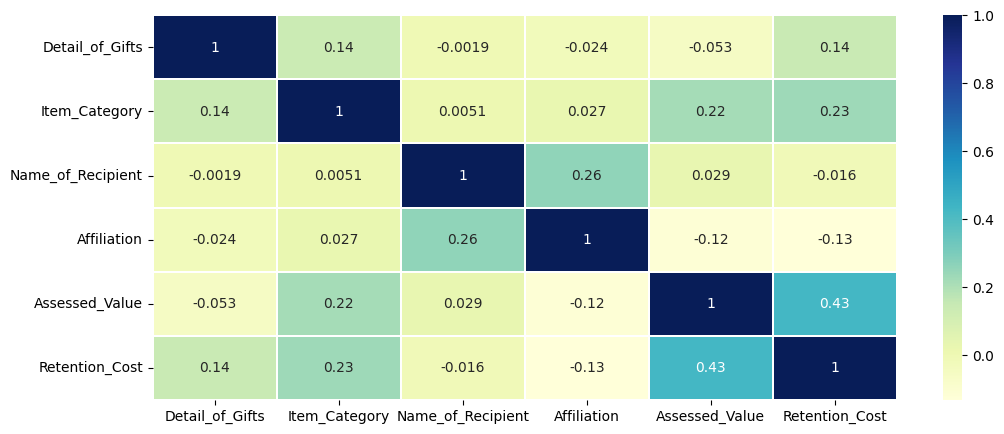

In [233]:

plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

Recommendations

1. We should mantain strong check and balances accoring to Free of Cost gifts count its necessary and Highest gifts are retainded by those who are unKnown.
2. We should spend money on education instead of buying weapons according to (buying Patterns you can see above).